<a href="https://colab.research.google.com/github/hpink97/tensorflow_keras_practice/blob/main/practice_covnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
##import libraries

##tf 
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

##file related libs
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import image_dataset_from_directory as import_img_dir
from google.colab import files
import os, shutil, pathlib

# Model 1 : MNIST CNN with Maxpooling

In [52]:
#import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [53]:
#### show an example image
n = int(np.random.choice(train_images.shape[0], 1, replace=False)  )
example_digit = train_images[n]
example_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 110, 237,  87,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 178, 254, 254, 210,  38,  15,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 224, 254, 254, 254, 254, 254, 206

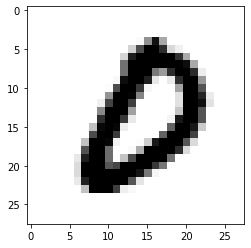

image label =0


In [54]:
plt.imshow(example_digit, cmap=plt.cm.binary)
plt.show()

print(f"image label ={train_labels[n]}")

In [55]:
### reshape and scale data
train_images = train_images.reshape((60000,28,28,1)).astype('float32')/255
test_images = test_images.reshape((10000,28,28,1)).astype('float32')/255

## Initiate the convolutional neural network (CNN)


*   Takes input tensor (image_height, image_width, image_channels)

`Conv2D()` is the convolutional layer. This will split the input tensor into 2D windows of size `kernel_size * kernal_size`. In addition it will also compute `filters`, which is the depth of the layer's output tensor. These are no longer colour channels, but arbritary filters calculated by the layer...


`MaxPooling2D` reduces the size of the output tensor, applying a hardcoded MAX transformation on 2*2 tensors. Allows information to be encoded on a larger proportion of the original input. Also reduces the complexity of the model, reducing compute and overfitting!!.

In [56]:
##initate a CovNet
inputs = keras.Input(shape=(28,28,1)) #28*28 pixel black&white images
my_layers = layers.Conv2D(filters=32, kernel_size=2, activation='relu')(inputs)
my_layers = layers.MaxPooling2D(pool_size =2)(my_layers)
my_layers = layers.Conv2D(filters=128, kernel_size=2, activation='relu')(my_layers)
my_layers = layers.MaxPooling2D(pool_size =2)(my_layers)
my_layers = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(my_layers)
my_layers = layers.MaxPooling2D(pool_size =2)(my_layers)
my_layers = layers.Flatten()(my_layers)
#mnist is 0-9, so output will be shape 10
outputs= layers.Dense(10, activation ='softmax')(my_layers)
covnet = keras.Model(inputs=inputs, outputs=outputs)

##summarise model
covnet.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 12, 12, 128)       16512     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 4, 4, 256)         2951

In [57]:
covnet.compile(optimizer='rmsprop',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

covnet.fit(train_images, train_labels, epochs=8, batch_size=128)

Epoch 1/8
469/469 [==============================] - 4s 6ms/step - loss: 0.2115 - accuracy: 0.9347
Epoch 2/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0525 - accuracy: 0.9836
Epoch 3/8
469/469 [==============================] - 4s 8ms/step - loss: 0.0337 - accuracy: 0.9893
Epoch 4/8
469/469 [==============================] - 4s 9ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 5/8
469/469 [==============================] - 4s 8ms/step - loss: 0.0180 - accuracy: 0.9944
Epoch 6/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0133 - accuracy: 0.9957
Epoch 7/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0107 - accuracy: 0.9968
Epoch 8/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0081 - accuracy: 0.9975


In [58]:
test_loss, test_acc =covnet.evaluate(test_images, test_labels)
print(f"CovNet testing accuracy on MNIST = {test_acc*100:.3f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9902
CovNet testing accuracy on MNIST = 99.020%


# Model 2: Cats vs Dogs (2K samples)

In [21]:
##import cat vs dogs kaggle competetion data


#files.upload()
#! mkdir ~/.kaggle/
#! cp kaggle.json  ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle competitions download -c dogs-vs-cats
#!unzip -qq dogs-vs-cats.zip
#! unzip -qq train.zip

In [30]:

def subset_images(subset_name, start_i, end_i):
  for x in ('cat','dog'):
    dir = new_dir/subset_name/x
    if dir.exists() and dir.is_dir():
      shutil.rmtree(dir)
    os.makedirs(dir)
    file_names = [f"{x}.{i}.jpg" for i in range(start_i, end_i)]
    for jpg in file_names:
      shutil.copyfile(src=orig_dir/jpg,
                      dst = dir/jpg)
      



In [35]:
orig_dir = pathlib.Path('train')
new_dir = pathlib.Path('cats_vs_dogs_small')

subset_images('train',0,1000)
subset_images('validation',1000,1500)
subset_images('test',1500,2500)

!ls cats_vs_dogs_small/train/dog | head -10

dog.0.jpg
dog.100.jpg
dog.101.jpg
dog.102.jpg
dog.103.jpg
dog.104.jpg
dog.105.jpg
dog.106.jpg
dog.107.jpg
dog.108.jpg


In [37]:
cats_v_dogs_train = import_img_dir(
    new_dir /'train',
    image_size=(180,180),
    batch_size =32
)

Found 2000 files belonging to 2 classes.


In [41]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)##rescale to 0-1
x = layers.Conv2D(filters=32,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation ='relu')(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
dog_cat_cnn = keras.Model(inputs=inputs, outputs=outputs)

dog_cat_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       